In [58]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import matplotlib.pyplot as plts
import seaborn as sns
from scipy.stats import norm
# from scipy import stats

In [59]:
df_Test, df_Control = [pd.read_csv(f) for f in ['./Data/test_group.csv', './Data/control_group.csv']]
df_Test.shape, df_Control.shape

((100, 2), (130, 2))

In [60]:
df_Test2,df_Control2 = df_Test.copy(),df_Control.copy()
df_Test2.shape,df_Test.shape,df_Control2.shape,df_Control.shape

((100, 2), (100, 2), (130, 2), (130, 2))

In [61]:
control_mean, control_std, control_size = df_Control2['recovery_time_hrs'].agg(['mean', 'std', 'size']).round(2)
control_mean, control_std, control_size

(4.0, 0.48, 130.0)

In [62]:
test_mean, test_std, test_size = df_Test2['recovery_time_hrs'].agg(['mean', 'std', 'size']).round(2)
test_mean, test_std, test_size

(3.91, 0.32, 100.0)

In [63]:
# Calculate the Z-score
z_score = (control_mean - test_mean) / np.sqrt((test_std**2 / test_size) + (control_std**2 / control_size))
z_score

np.float64(1.701962671923127)

In [64]:
alpha = 0.05
critical_z_value = norm.ppf(1 - alpha)    ### Critical Z value for 95% confidence for a one tail test because we want to see if 
critical_z_value                              ### the control group is greater than the test group

np.float64(1.6448536269514722)

In [65]:
if z_score > critical_z_value:
    print("Reject the Null Hypothesis and accept the Alternative Hypothesis => New medication more effective than the old medication")
else:
    print("Fail to reject the Null Hypothesis => New medication is not more effective than the old medication")

Reject the Null Hypothesis and accept the Alternative Hypothesis => New medication more effective than the old medication


In [66]:
# Calculate the P-value from the Z-score
p_value = 1 - norm.cdf(z_score)
p_value

np.float64(0.0443811829929599)

In [67]:
if p_value > critical_z_value:
    print("Reject the Null Hypothesis and accept the Alternative Hypothesis => New medication more effective than the old medication")
else:
    print("Fail to reject the Null Hypothesis => New medication is not more effective than the old medication")

Fail to reject the Null Hypothesis => New medication is not more effective than the old medication


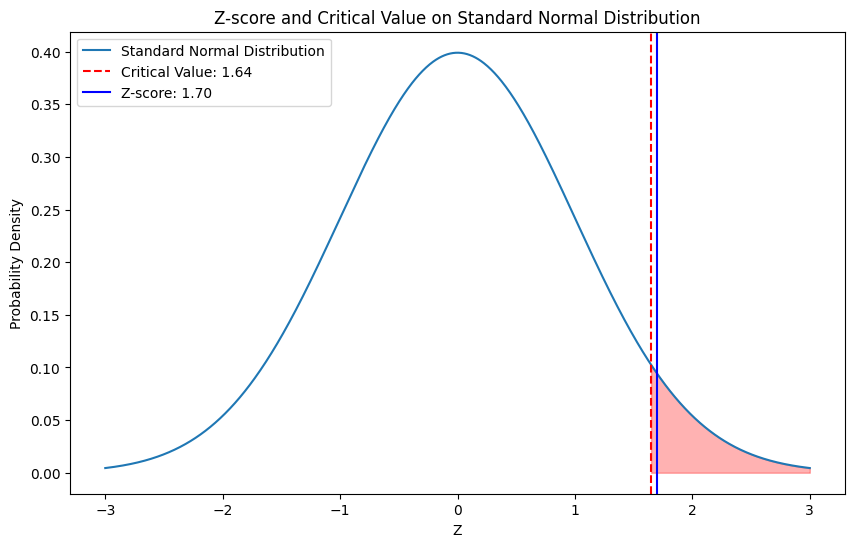

In [68]:
# Plot the standard normal distribution
x = np.linspace(-3, 3, 1000)
y = norm.pdf(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Standard Normal Distribution')

# Mark the critical value
plt.axvline(critical_z_value, color='r', linestyle='--', label=f'Critical Value: {critical_z_value:.2f}')

# Mark the Z-score
plt.axvline(z_score, color='b', linestyle='-', label=f'Z-score: {z_score:.2f}')

# Fill the rejection region
plt.fill_between(x, 0, y, where=(x > critical_z_value), color='red', alpha=0.3)

plt.title('Z-score and Critical Value on Standard Normal Distribution')
plt.xlabel('Z')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [69]:
# Calculate the statistical power
power = 1 - norm.cdf(critical_z_value - z_score)
power

np.float64(0.5227708343305271)

In [70]:
##### Increase the sample size to increase the power of the test

In [71]:
# Increase the sample size by duplicating the existing data
df_Test_larger = pd.concat([df_Test2] * 2, ignore_index=True)
df_Control_larger = pd.concat([df_Control2] * 2, ignore_index=True)

# Recalculate the means, standard deviations, and sizes
test_mean_larger, test_std_larger, test_size_larger = df_Test_larger['recovery_time_hrs'].agg(['mean', 'std', 'size']).round(2)
control_mean_larger, control_std_larger, control_size_larger = df_Control_larger['recovery_time_hrs'].agg(['mean', 'std', 'size']).round(2)

# Recalculate the Z-score
z_score_larger = (control_mean_larger - test_mean_larger) / np.sqrt((test_std_larger**2 / test_size_larger) + (control_std_larger**2 / control_size_larger))

# Recalculate the statistical power
power_larger = 1 - norm.cdf(critical_z_value - z_score_larger)

z_score_larger, power_larger

(np.float64(2.4345194325755255), np.float64(0.785138516934156))

In [72]:
# Calculate the P-value from the Z-score
p_value_large = 1 - norm.cdf(z_score_larger)
p_value_large

np.float64(0.007455789573904248)

In [73]:
if p_value_large > critical_z_value:
    print("Reject the Null Hypothesis and accept the Alternative Hypothesis => New medication more effective than the old medication")
else:
    print("Fail to reject the Null Hypothesis => New medication is not more effective than the old medication")

Fail to reject the Null Hypothesis => New medication is not more effective than the old medication


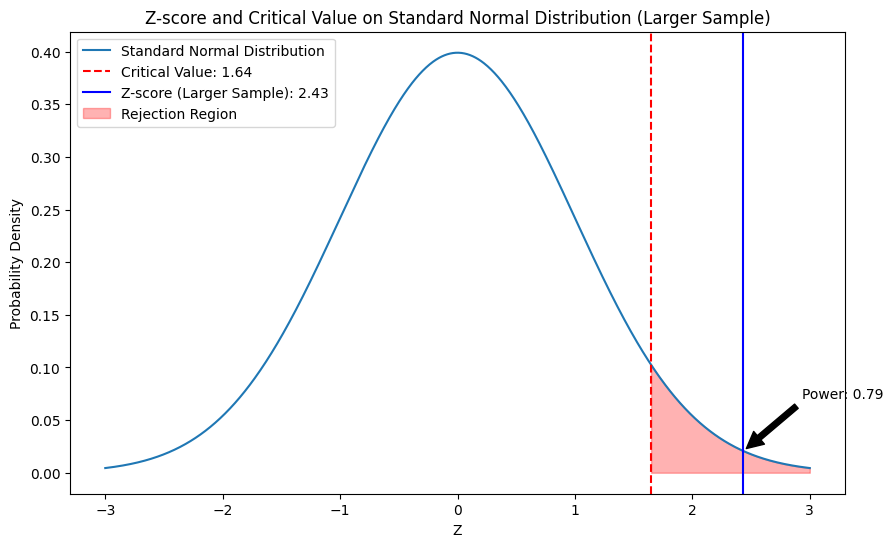

In [74]:
# Plot the standard normal distribution
x = np.linspace(-3, 3, 1000)
y = norm.pdf(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Standard Normal Distribution')

# Mark the critical value
plt.axvline(critical_z_value, color='r', linestyle='--', label=f'Critical Value: {critical_z_value:.2f}')

# Mark the Z-score for the larger sample
plt.axvline(z_score_larger, color='b', linestyle='-', label=f'Z-score (Larger Sample): {z_score_larger:.2f}')

# Fill the rejection region
plt.fill_between(x, 0, y, where=(x > critical_z_value), color='red', alpha=0.3, label='Rejection Region')

# Annotate the power
plt.annotate(f'Power: {power_larger:.2f}', xy=(z_score_larger, norm.pdf(z_score_larger)), xytext=(z_score_larger + 0.5, norm.pdf(z_score_larger) + 0.05),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.title('Z-score and Critical Value on Standard Normal Distribution (Larger Sample)')
plt.xlabel('Z')
plt.ylabel('Probability Density')
plt.legend()
plt.show()